<a href="https://colab.research.google.com/github/bennyqp/artificial-inspiration/blob/main/Image%20Generation/ai_image_generation_styleGAN_blending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Network blending in StyleGAN

_

This is a notebook from Justin Pinkney

This notebook is completely and with no changes copied from Justin Pinkney

(https://github.com/justinpinkney/)

You can find the original here:

https://colab.research.google.com/drive/1tputbmA9EaXs9HL9iO21g7xN7jz_Xrko?usp=sharing

_

# Network blending in StyleGAN

Swapping layers between two models in StyleGAN gives some interesting results. You need a base model and a second model which has been fine-tuned from the base.

In [ ]:
!git clone https://github.com/justinpinkney/stylegan2.git

In [ ]:
%cd stylegan2

In [ ]:
%tensorflow_version 1.x
!pip install typer

Command line help for the blending function is below. Make sure that you specify either `--output-grid` to save an example image or `--output-pkl` to save the modified pkl. (Currently only the the Gs network is modified)

- low_res_pkl: Path, # Pickle file from which to take low res layers
- high_res_pkl: Path, # Pickle file from which to take high res layers
- resolution: int, # Resolution level at which to switch between models
- level: int  = 0, # Switch at Conv block 0 or 1?
- blend_width: Optional[float] = None, # None = hard switch, float = smooth switch (logistic) with given width
- output_grid: Optional[Path] = "blended.jpg", # Path of image file to save example grid (None = don't save)
- seed: int = 0, # seed for random grid
- output_pkl: Optional[Path] = None, # Output path of pickle (None = don't save)
- verbose: bool = False, # Print out the exact blending fraction

         

In [ ]:
!python blend_models.py --help

Use as an example a model I fine-tuned at 256 from FFHQ to data scraped from NASA DSCOVR:EPIC satellite (https://epic.gsfc.nasa.gov/).

For the output of the fine-tuned model see the tweet below (https://twitter.com/Buntworthy/status/1295445259971899393)

I'm actually going to use a model from earlier in training than the result shown in the tweet, this makes the blending a bit nicer.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import Image 

Time to try out a bunch of different resolutions for the switch and display the results. Remember the earth model provides the low-resolution layers, i.e. the "structure", and the original faces model the high-resolution, i.e. the "texture"

I'm going to run the main function in blend_models.py in a python loop, but you can also run it from the command line, something like

`python blend_models.py epic-slim-256-000040.pkl stylegan2-ffhq.pkl 64 --output-grid "blended.jpg"`

blending at 8x8


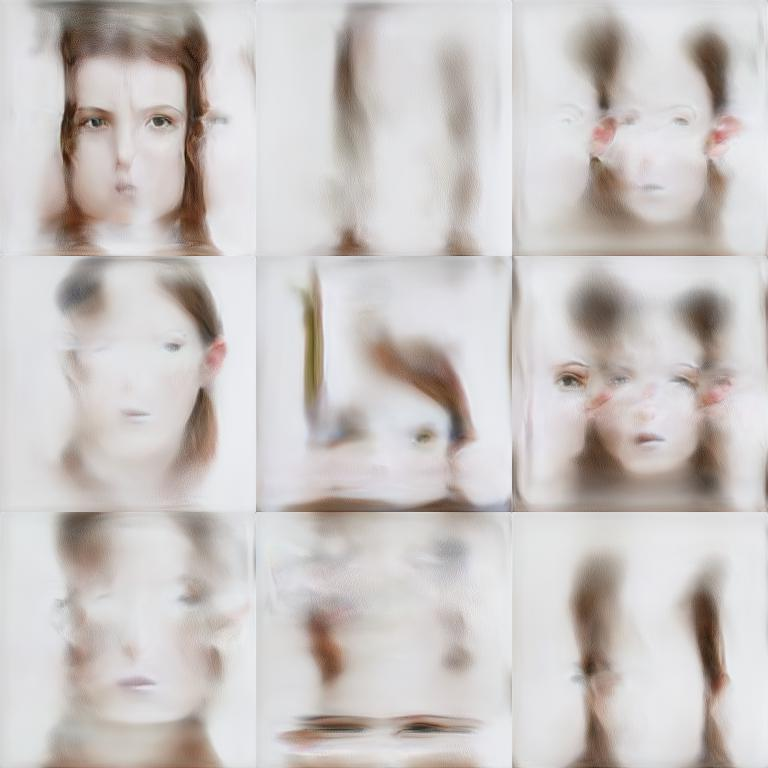

blending at 16x16


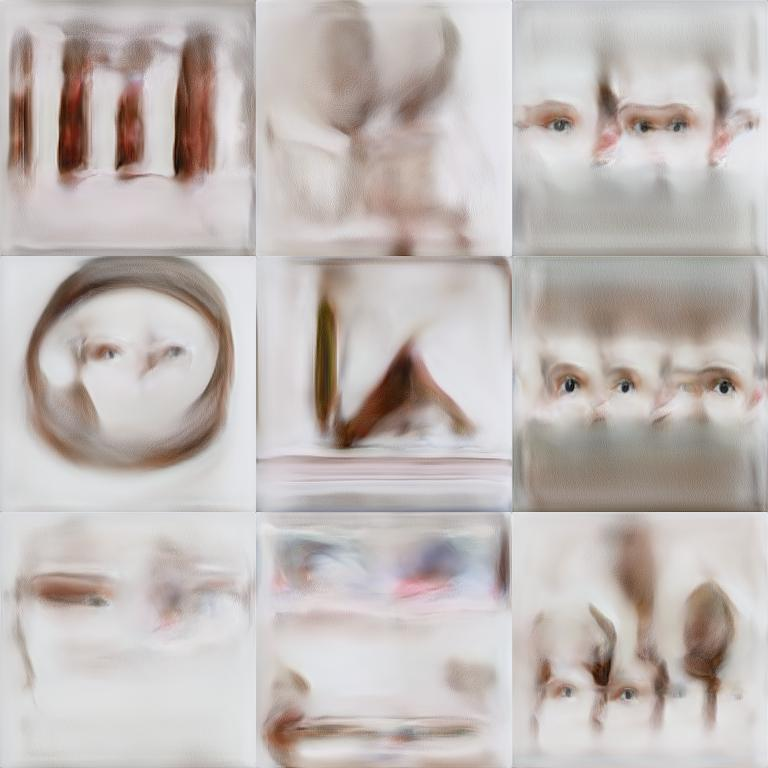

blending at 32x32


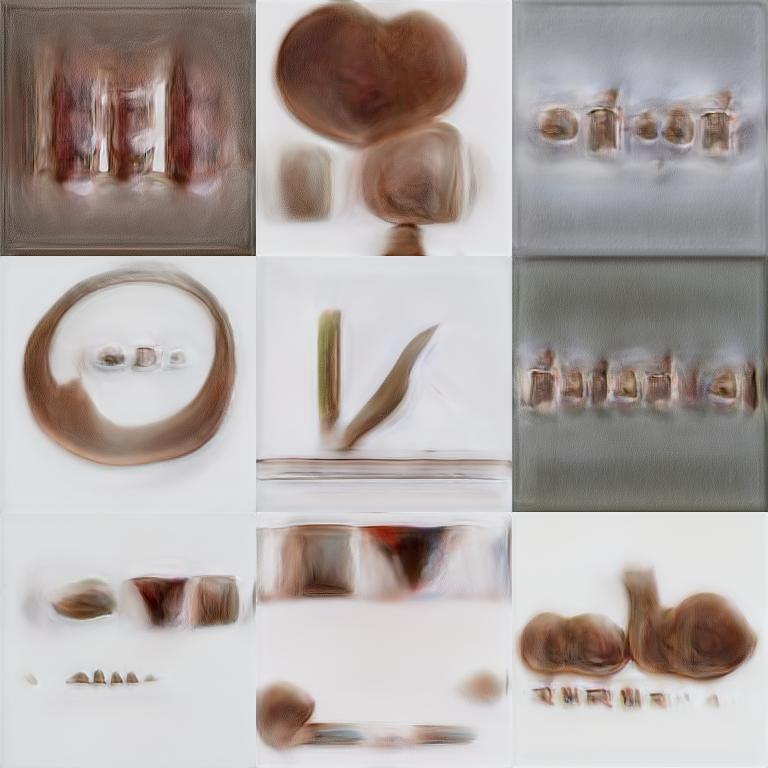

blending at 64x64


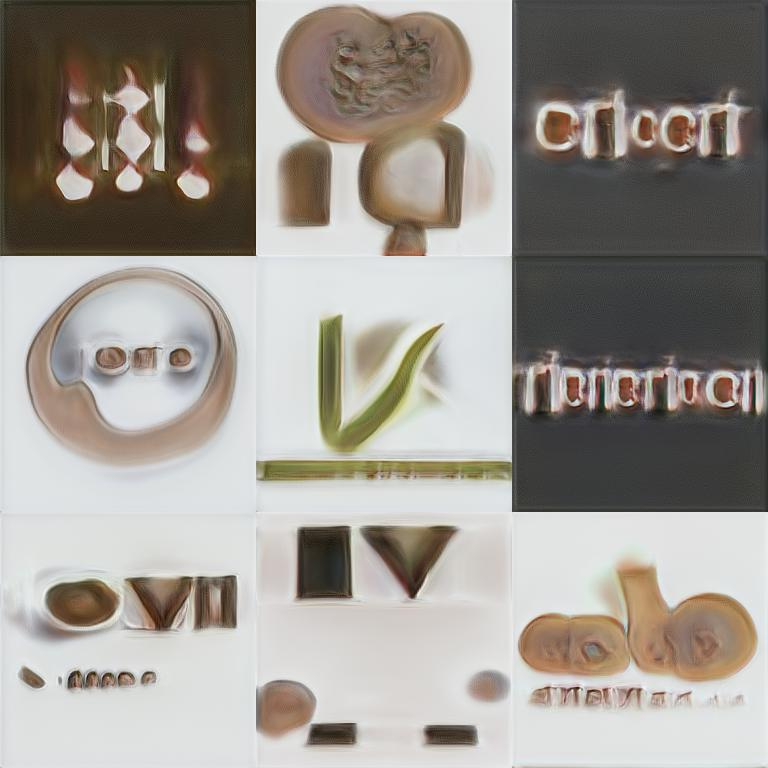

blending at 128x128


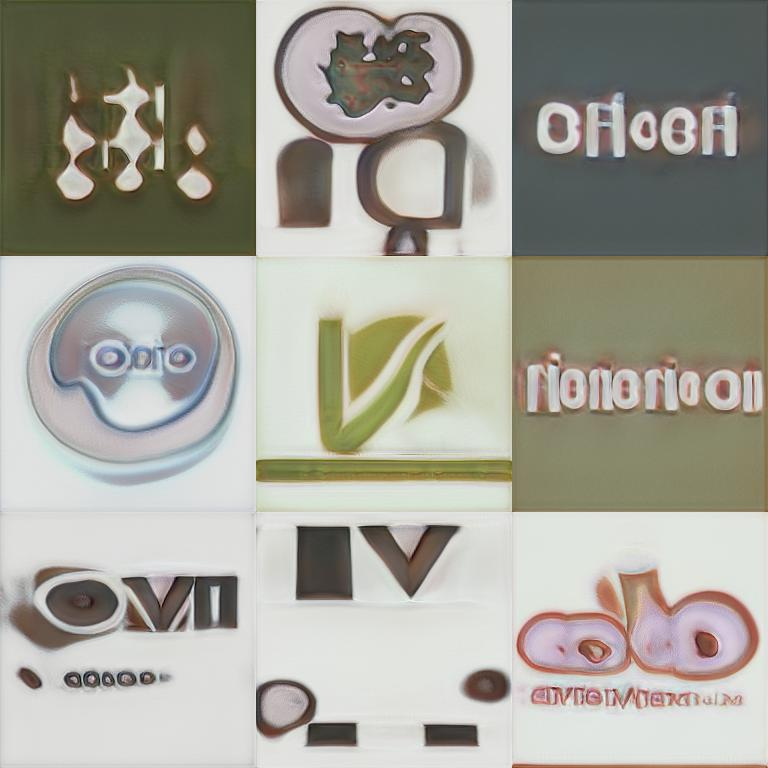

In [ ]:
import blend_models

resolutions = (8, 16, 32, 64, 128)
for res in resolutions:
  filename = f"blended-{res}.jpg"
  blend_models.main("model1.pkl", "model2.pkl", res, output_grid=filename)
  img = Image(filename=filename)
  print(f"blending at {res}x{res}")
  display(img)

In [ ]:
!python model1.pkl model2.pkl 16 --output-pkl="blendedModel.pkl"